FileNotFoundError: [Errno 2] No such file or directory: 'E:\\AI\\baseline\\UNSW_NB15\\draw\\UNSW_NB15\\draw\\bar\\A_dl_model_comparison_bar_2.png'

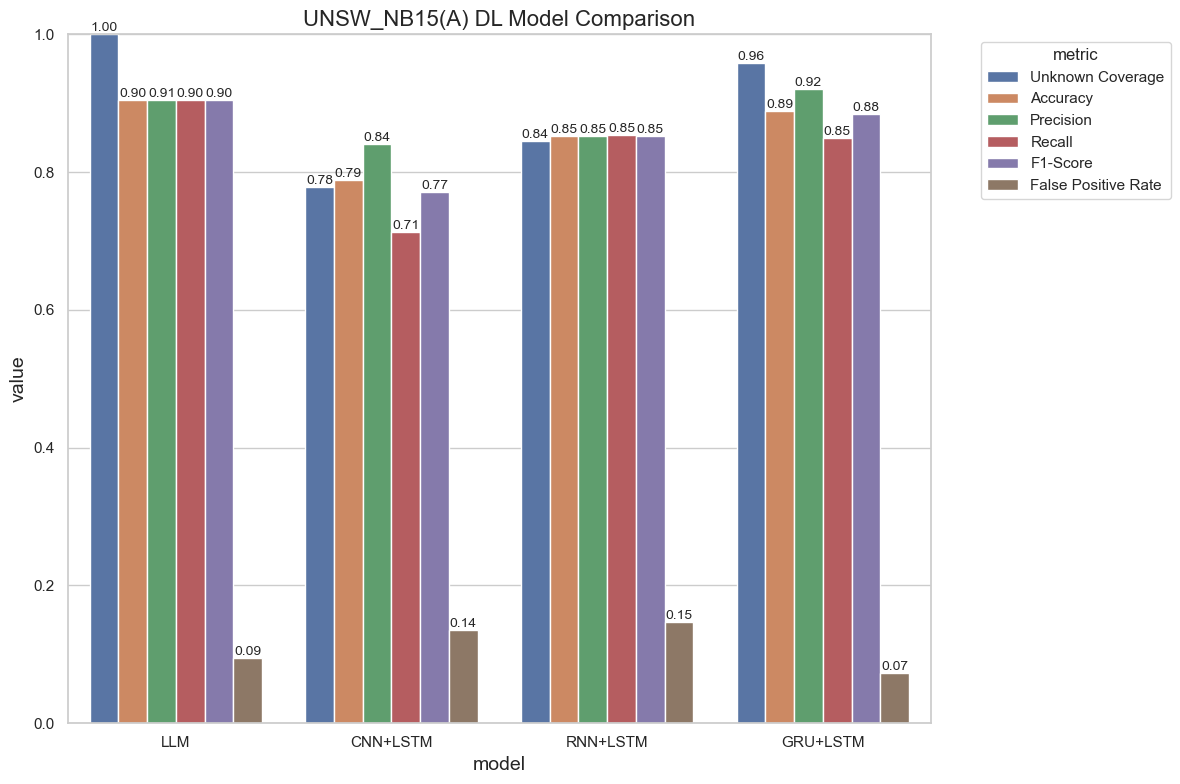

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

def plot_model_comparison(models, metrics, values, title="Model Performance Comparison", figsize=(12, 8), save_path=None):
    """
    绘制不同模型各项指标的对比图
    
    参数:
    models: list, 模型名称列表
    metrics: list, 评估指标名称列表
    values: list of lists, 每个模型对应的各项指标值
    title: str, 图表标题
    figsize: tuple, 图表大小
    save_path: str, 保存路径，如果为None则不保存

    """
    # 创建DataFrame以便使用seaborn
    data = []
    for i, model in enumerate(models):
        for j, metric in enumerate(metrics):
            data.append({
                'model': model,
                'metric': metric,
                'value': values[i][j]
            })
    df = pd.DataFrame(data)
    
    # 设置样式
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)
    
    # 绘制条形图
    ax = sns.barplot(x='model', y='value', hue='metric', data=df)
    
    # 添加标题和标签
    plt.title(title, fontsize=16)
    plt.xlabel('model', fontsize=14)
    plt.ylabel('value', fontsize=14)
    plt.ylim(0, 1.0)  # 假设指标值在0-1之间
    
    # 在条形上方添加数值标签
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', fontsize=10)
    
    # 调整图例位置
    plt.legend(title='metric', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    
    # 保存图表
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # plt.show()

def plot_model_comparison_radar(models, metrics, values, title="model performance radar chart", figsize=(10, 8), save_path=None):
    """
    绘制不同模型各项指标的雷达图对比
    
    参数:
    models: list, 模型名称列表
    metrics: list, 评估指标名称列表
    values: list of lists, 每个模型对应的各项指标值
    title: str, 图表标题
    figsize: tuple, 图表大小
    save_path: str, 保存路径，如果为None则不保存
    """
    # 设置图表
    plt.figure(figsize=figsize)
    
    # 计算雷达图的角度
    angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
    angles += angles[:1]  # 闭合雷达图
    
    # 设置极坐标图
    ax = plt.subplot(111, polar=True)
    
    # 添加每个模型的数据
    for i, model in enumerate(models):
        values_model = values[i]
        values_model += values_model[:1]  # 闭合雷达图
        ax.plot(angles, values_model, 'o-', linewidth=2, label=model)
        ax.fill(angles, values_model, alpha=0.1)
    
    # 设置刻度标签
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)
    
    # 设置y轴范围
    ax.set_ylim(0, 1)
    
    # 添加图例和标题
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title(title, fontsize=16)
    
    plt.tight_layout()
    
    # 保存图表
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # plt.show()

def plot_model_comparison_heatmap(models, metrics, values, title="model performance heatmap", figsize=(10, 8), save_path=None):
    """
    绘制不同模型各项指标的热力图对比
    
    参数:
    models: list, 模型名称列表
    metrics: list, 评估指标名称列表
    values: list of lists, 每个模型对应的各项指标值
    title: str, 图表标题
    figsize: tuple, 图表大小
    save_path: str, 保存路径，如果为None则不保存
    """
    # 创建数据矩阵
    data_matrix = np.array(values)
    
    # 设置图表
    plt.figure(figsize=figsize)
    
    # 绘制热力图
    ax = sns.heatmap(data_matrix, annot=True, fmt=".2f", cmap="YlGnBu",
                     xticklabels=metrics, yticklabels=models, vmin=0, vmax=1)
    
    # 添加标题和标签
    plt.title(title, fontsize=16)
    plt.tight_layout()
    
    # 保存图表
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    # plt.show()


# DL模型数据
dl_models = ['LLM', 'CNN+LSTM', 'RNN+LSTM', 'GRU+LSTM']
dl_values_A = [
    [1, 0.9048, 0.9051, 0.9044, 0.9048, 0.0948],  # LLM的各项指标
    [0.7789, 0.7885, 0.8403, 0.7124, 0.7711, 0.1354],  # CNN+LSTM的各项指标 
    [0.8446, 0.8530, 0.8529, 0.8532, 0.8530, 0.1472],  # RNN+LSTM的各项指标
    [0.9585, 0.8884, 0.9209, 0.8498, 0.8839, 0.0730]   # GRU+LSTM的各项指标
]
dl_values_B = [
    [0.9983, 0.8987, 0.9093, 0.8858, 0.8974, 0.0884],  # LLM的各项指标
    [0.8781, 0.7096, 0.7278, 0.6696, 0.6975, 0.2504],  # CNN+LSTM的各项指标 
    [0.9781, 0.8997, 0.8988, 0.9008, 0.8998, 0.1014],  # RNN+LSTM的各项指标
    [0.9592, 0.8172, 0.8658, 0.7508, 0.8042, 0.1164]   # GRU+LSTM的各项指标
]
dl_values_D = [
    [0.9819, 0.9024, 0.9118, 0.8910, 0.9013, 0.0862],  # LLM的各项指标
    [0.9717, 0.7598, 0.7445, 0.7910, 0.7671, 0.2714],  # CNN+LSTM的各项指标 
    [0.8669, 0.9015, 0.9398, 0.8580, 0.8970, 0.0550],  # RNN+LSTM的各项指标
    [0.8593, 0.8201, 0.8648, 0.7588, 0.8084, 0.1186]   # GRU+LSTM的各项指标
]
dl_values_E = [
    [0.8968, 0.9000, 0.9073, 0.8910, 0.8991, 0.0910],  # LLM的各项指标
    [0.0201, 0.5965, 0.8653, 0.2286, 0.3617, 0.0356],  # CNN+LSTM的各项指标 
    [0.4427, 0.8270, 0.8648, 0.7752, 0.8175, 0.1212],  # RNN+LSTM的各项指标
    [0.4131, 0.8136, 0.8538, 0.7568, 0.8024, 0.1296]   # GRU+LSTM的各项指标
]
dl_values_F = [
    [0.7494, 0.8987, 0.9151, 0.8790, 0.8967, 0.0816],  # LLM的各项指标
    [0.1713, 0.6162, 0.7364, 0.3620, 0.4854, 0.1296],  # CNN+LSTM的各项指标 
    [0.5483, 0.7814, 0.8593, 0.6730, 0.7548, 0.1102],  # RNN+LSTM的各项指标
    [0.5328, 0.8029, 0.9304, 0.6548, 0.7686, 0.0490]   # GRU+LSTM的各项指标
]
dl_values_G = [
    [0.9969, 0.9127, 0.9144, 0.9106, 0.9125, 0.0852],  # LLM的各项指标
    [0.9979, 0.8217, 0.8860, 0.7384, 0.8055, 0.0950],  # CNN+LSTM的各项指标 
    [0.9960, 0.8802, 0.9108, 0.8430, 0.8756, 0.0826],  # RNN+LSTM的各项指标
    [0.9928, 0.8762, 0.9474, 0.7966, 0.8655, 0.0442]   # GRU+LSTM的各项指标
]
dl_values_R = [
    [0.9233, 0.9125, 0.9141, 0.9106, 0.9123, 0.0856],  # LLM的各项指标
    [0.5821, 0.8221, 0.8263, 0.8156, 0.8209, 0.1714],  # CNN+LSTM的各项指标 
    [0.9895, 0.8700, 0.8777, 0.8598, 0.8687, 0.1198],  # RNN+LSTM的各项指标
    [0.9054, 0.9002, 0.9283, 0.8674, 0.8968, 0.0670]   # GRU+LSTM的各项指标
]
dl_values_S = [
    [1.0000, 0.9201, 0.9144, 0.9270, 0.9206, 0.0868],  # LLM的各项指标
    [0.6102, 0.8582, 0.8962, 0.8102, 0.8511, 0.0938],  # CNN+LSTM的各项指标 
    [0.4983, 0.8959, 0.9072, 0.8820, 0.8944, 0.0902],  # RNN+LSTM的各项指标
    [0.5169, 0.8890, 0.8815, 0.8988, 0.8901, 0.1208]   # GRU+LSTM的各项指标
]
dl_values_W = [
    [1.0000, 0.9066, 0.9129, 0.8990, 0.9059, 0.0858],  # LLM的各项指标
    [0.3736, 0.7936, 0.7918, 0.7966, 0.7942, 0.2094],  # CNN+LSTM的各项指标 
    [0.9828, 0.8627, 0.8798, 0.8402, 0.8595, 0.1148],  # RNN+LSTM的各项指标
    [0.9713, 0.8981, 0.8971, 0.8994, 0.8982, 0.1032]   # GRU+LSTM的各项指标
]

# ML模型数据
ml_models = ['LLM','SVM', 'Random Forest', 'Decision Tree', 'Logistic Regression', 'XGBoost']
ml_values_A = [
    [1, 0.9048, 0.9051, 0.9044, 0.9048, 0.0948],  # LLM的各项指标
    [0.9907, 0.9346, 0.9249, 0.9460, 0.9353, 0.0768],  # SVM的各项指标
    [0.9940, 0.9989, 0.9996, 0.9982, 0.9989, 0.0004],  # Random Forest的各项指标
    [0.7755, 0.6781, 0.9944, 0.3582, 0.5267, 0.0020],  # Decision Tree的各项指标
    [0.9955, 0.9267, 0.9129, 0.9434, 0.9279, 0.0900],  # Logistic Regression的各项指标
    [0.9892, 0.9961, 0.9984, 0.9938, 0.9961, 0.0016]   # XGBoost的各项指标
]
ml_values_B = [
    [0.9983, 0.8987, 0.9093, 0.8858, 0.8974, 0.0884],  # LLM的各项指标
    [0.9897, 0.9339, 0.9245, 0.9450, 0.9346, 0.0772],  # SVM的各项指标
    [0.9751, 0.9974, 0.9996, 0.9952, 0.9974, 0.0004],  # Random Forest的各项指标
    [0.7673, 0.6787, 0.9961, 0.3588, 0.5276, 0.0014],  # Decision Tree的各项指标
    [0.9888, 0.9297, 0.9192, 0.9422, 0.9306, 0.0828],  # Logistic Regression的各项指标
    [0.9760, 0.9976, 0.9996, 0.9956, 0.9976, 0.0004]   # XGBoost的各项指标
]
ml_values_D = [
    [0.9819, 0.9024, 0.9118, 0.8910, 0.9013, 0.0862],  # LLM的各项指标
    [0.9782, 0.9312, 0.9242, 0.9394, 0.9318, 0.0770],  # SVM的各项指标
    [0.9985, 0.9986, 0.9996, 0.9976, 0.9986, 0.0004],  # Random Forest的各项指标
    [0.8361, 0.6766, 0.9884, 0.3574, 0.5250, 0.0042],  # Decision Tree的各项指标
    [0.9688, 0.9339, 0.9248, 0.9446, 0.9346, 0.0768],  # Logistic Regression的各项指标
    [0.9926, 0.9967, 0.9996, 0.9938, 0.9967, 0.0004]   # XGBoost的各项指标
]
ml_values_E = [
    [0.8968, 0.9000, 0.9073, 0.8910, 0.8991, 0.0910],  # LLM的各项指标
    [0.9907, 0.9346, 0.9249, 0.9460, 0.9353, 0.0768],  # SVM的各项指标 (使用A类型数据，因为没有E类型数据)
    [0.9952, 0.9969, 0.9998, 0.9940, 0.9969, 0.0002],  # Random Forest的各项指标
    [0.9274, 0.6755, 0.9861, 0.3560, 0.5231, 0.0050],  # Decision Tree的各项指标
    [0.4950, 0.8722, 0.9134, 0.8224, 0.8655, 0.0780],  # Logistic Regression的各项指标
    [0.9910, 0.9961, 0.9984, 0.9938, 0.9961, 0.0016]   # XGBoost的各项指标
]
ml_values_F = [
    [0.7494, 0.8987, 0.9151, 0.8790, 0.8967, 0.0816],  # LLM的各项指标
    [0.5610, 0.8985, 0.9449, 0.8464, 0.8929, 0.0494],  # SVM的各项指标
    [0.9993, 0.9993, 0.9998, 0.9988, 0.9993, 0.0002],  # Random Forest的各项指标
    [0.8981, 0.6756, 0.9944, 0.3532, 0.5213, 0.0020],  # Decision Tree的各项指标
    [0.8844, 0.9110, 0.9225, 0.8974, 0.9098, 0.0754],  # Logistic Regression的各项指标
    [0.9975, 0.9961, 0.9984, 0.9938, 0.9961, 0.0016]   # XGBoost的各项指标
]
ml_values_G = [
    [0.9969, 0.9127, 0.9144, 0.9106, 0.9125, 0.0852],  # LLM的各项指标
    [0.9986, 0.9348, 0.9254, 0.9458, 0.9355, 0.0762],  # SVM的各项指标
    [1.0000, 0.9994, 0.9994, 0.9994, 0.9994, 0.0006],  # Random Forest的各项指标
    [0.6890, 0.6766, 0.9884, 0.3574, 0.5250, 0.0042],  # Decision Tree的各项指标
    [0.9982, 0.9321, 0.9167, 0.9506, 0.9333, 0.0864],  # Logistic Regression的各项指标
    [0.9999, 0.9967, 0.9996, 0.9938, 0.9967, 0.0004]   # XGBoost的各项指标
]
ml_values_R = [
    [0.9233, 0.9125, 0.9141, 0.9106, 0.9123, 0.0856],  # LLM的各项指标
    [0.7906, 0.9349, 0.9250, 0.9466, 0.9357, 0.0768],  # SVM的各项指标
    [0.9989, 0.9992, 0.9996, 0.9988, 0.9992, 0.0004],  # Random Forest的各项指标
    [0.9357, 0.8030, 0.9925, 0.6106, 0.7561, 0.0046],  # Decision Tree的各项指标
    [0.9215, 0.9314, 0.9171, 0.9486, 0.9326, 0.0858],  # Logistic Regression的各项指标
    [0.9990, 0.9961, 0.9984, 0.9938, 0.9961, 0.0016]   # XGBoost的各项指标
]
ml_values_S = [
    [1.0000, 0.9201, 0.9144, 0.9270, 0.9206, 0.0868],  # LLM的各项指标
    [0.4950, 0.9349, 0.9250, 0.9466, 0.9357, 0.0768],  # SVM的各项指标
    [0.4964, 0.9992, 0.9996, 0.9988, 0.9992, 0.0004],  # Random Forest的各项指标
    [0.1317, 0.8030, 0.9925, 0.6106, 0.7561, 0.0046],  # Decision Tree的各项指标
    [0.4964, 0.9314, 0.9171, 0.9486, 0.9326, 0.0858],  # Logistic Regression的各项指标
    [0.0126, 0.9961, 0.9984, 0.9938, 0.9961, 0.0016]   # XGBoost的各项指标
]
ml_values_W = [
    [1.0000, 0.9066, 0.9129, 0.8990, 0.9059, 0.0858],  # LLM的各项指标
    [0.9598, 0.9349, 0.9250, 0.9466, 0.9357, 0.0768],  # SVM的各项指标
    [0.8793, 0.9992, 0.9996, 0.9988, 0.9992, 0.0004],  # Random Forest的各项指标
    [0.7126, 0.8030, 0.9925, 0.6106, 0.7561, 0.0046],  # Decision Tree的各项指标
    [0.9713, 0.9314, 0.9171, 0.9486, 0.9326, 0.0858],  # Logistic Regression的各项指标
    [0.5172, 0.9961, 0.9984, 0.9938, 0.9961, 0.0016]   # XGBoost的各项指标
]

# AIS模型数据
als_model = ['LLM','VD', 'VD+KNN', 'VD+SVM', 'VD+RF', 'VD+XGB']
als_values_A = [
    [1, 0.9048, 0.9051, 0.9044, 0.9048, 0.0948],  # LLM的各项指标
    [0.2069, 0.5369, 0.8773, 0.0858, 0.1563, 0.0012],  # VD的各项指标
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+KNN的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+SVM的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+RF的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]   # VD+XGB的各项指标 (数据缺失)
]
als_values_B = [
    [0.9983, 0.8987, 0.9093, 0.8858, 0.8974, 0.0884],  # LLM的各项指标
    [0.8536, 0.6660, 0.6613, 0.6806, 0.6708, 0.3486],  # VD的各项指标
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+KNN的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+SVM的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+RF的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]   # VD+XGB的各项指标 (数据缺失)

]
als_values_D = [
    [0.9819, 0.9024, 0.9118, 0.8910, 0.9013, 0.0862],  # LLM的各项指标
    [0.9063, 0.5797, 0.5605, 0.7388, 0.6374, 0.5794],  # VD的各项指标
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+KNN的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+SVM的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+RF的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]   # VD+XGB的各项指标 (数据缺失)
]
als_values_E = [
    [0.8968, 0.9000, 0.9073, 0.8910, 0.8991, 0.0910],  # LLM的各项指标
    [0.1549, 0.6020, 0.7157, 0.3384, 0.4595, 0.1344],  # VD的各项指标
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+KNN的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+SVM的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+RF的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]   # VD+XGB的各项指标 (数据缺失)
]
als_values_F = [
    [0.7494, 0.8987, 0.9151, 0.8790, 0.8967, 0.0816],  # LLM的各项指标
    [0.8753, 0.6119, 0.5704, 0.9070, 0.7003, 0.6832],  # VD的各项指标
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+KNN的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+SVM的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+RF的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]   # VD+XGB的各项指标 (数据缺失)
]
als_values_G = [
    [0.9969, 0.9127, 0.9144, 0.9106, 0.9125, 0.0852],  # LLM的各项指标
    [0.9971, 0.5772, 0.5469, 0.9002, 0.6804, 0.7458],  # VD的各项指标
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+KNN的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+SVM的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+RF的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]   # VD+XGB的各项指标 (数据缺失)
]
als_values_R = [
    [0.9233, 0.9125, 0.9141, 0.9106, 0.9123, 0.0856],  # LLM的各项指标
    [0.0749, 0.6101, 0.8469, 0.2688, 0.4081, 0.0486],  # VD的各项指标
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+KNN的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+SVM的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+RF的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]   # VD+XGB的各项指标 (数据缺失)
]
als_values_S = [
    [1.0000, 0.9201, 0.9144, 0.9270, 0.9206, 0.0868],  # LLM的各项指标
    [0.5255, 0.5809, 0.5515, 0.8668, 0.6741, 0.7050],  # VD的各项指标
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+KNN的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+SVM的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+RF的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]   # VD+XGB的各项指标 (数据缺失)
]
als_values_W = [
    [1.0000, 0.9066, 0.9129, 0.8990, 0.9059, 0.0858],  # LLM的各项指标
    [0.7529, 0.5024, 0.5036, 0.3320, 0.4002, 0.3272],  # VD的各项指标
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+KNN的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+SVM的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],  # VD+RF的各项指标 (数据缺失)
    [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]   # VD+XGB的各项指标 (数据缺失)
]

metrics = ['Unknown Coverage', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'False Positive Rate']

def plot_all_models(unknown_type):

    if unknown_type == 'A':
        dl_values = dl_values_A
        ml_values = ml_values_A
        als_values = als_values_A
    elif unknown_type == 'B':
        dl_values = dl_values_B
        ml_values = ml_values_B
        als_values = als_values_B
    elif unknown_type == 'D':
        dl_values = dl_values_D
        ml_values = ml_values_D
        als_values = als_values_D
    elif unknown_type == 'E':
        dl_values = dl_values_E
        ml_values = ml_values_E
        als_values = als_values_E
    elif unknown_type =='F':
        dl_values = dl_values_F
        ml_values = ml_values_F
        als_values = als_values_F
    elif unknown_type =='G':
        dl_values = dl_values_G
        ml_values = ml_values_G
        als_values = als_values_G
    elif unknown_type =='R':
        dl_values = dl_values_R
        ml_values = ml_values_R
        als_values = als_values_R
    elif unknown_type =='S':
        dl_values = dl_values_S
        ml_values = ml_values_S
        als_values = als_values_S
    elif unknown_type =='W':
        dl_values = dl_values_W
        ml_values = ml_values_W
        als_values = als_values_W

        
    # DL模型    
    plot_model_comparison(dl_models, metrics, dl_values, 
        title=f"UNSW_NB15({unknown_type}) DL Model Comparison", 
        save_path=f"UNSW_NB15/draw/bar/{unknown_type}_dl_model_comparison_bar_2.png")
    plot_model_comparison_radar(dl_models, metrics, dl_values,
        title=f"UNSW_NB15({unknown_type}) DL Model Comparison Radar",
        save_path=f"UNSW_NB15/draw/radar/{unknown_type}_dl_model_comparison_radar_2.png")
    plot_model_comparison_heatmap(dl_models, metrics, dl_values,
        title=f"UNSW_NB15({unknown_type}) DL Model Comparison Heatmap",
        save_path=f"UNSW_NB15/draw/heatmap/{unknown_type}_dl_model_comparison_heatmap_2.png")
    # ML模型
    plot_model_comparison(ml_models, metrics, ml_values,
        title=f"UNSW_NB15({unknown_type}) ML Model Comparison",
        save_path=f"UNSW_NB15/draw/bar/{unknown_type}_ml_model_comparison_bar_2.png")
    plot_model_comparison_radar(ml_models, metrics, ml_values,
        title=f"UNSW_NB15({unknown_type}) ML Model Comparison Radar",
        save_path=f"UNSW_NB15/draw/radar/{unknown_type}_ml_model_comparison_radar_2.png")
    plot_model_comparison_heatmap(ml_models, metrics, ml_values,
        title=f"UNSW_NB15({unknown_type}) ML Model Comparison Heatmap",
        save_path=f"UNSW_NB15/draw/heatmap/{unknown_type}_ml_model_comparison_heatmap_2.png")
    # AIS模型    
    plot_model_comparison(als_model, metrics, als_values,
        title=f"UNSW_NB15({unknown_type}) AIS Model Comparison",
        save_path=f"UNSW_NB15/draw/bar/{unknown_type}_ais_model_comparison_bar_2.png")
    plot_model_comparison_radar(als_model, metrics, als_values,
        title=f"UNSW_NB15({unknown_type}) AIS Model Comparison Radar",
        save_path=f"UNSW_NB15/draw/radar/{unknown_type}_ais_model_comparison_radar_2.png")
    plot_model_comparison_heatmap(als_model, metrics, als_values,
        title=f"UNSW_NB15({unknown_type}) AIS Model Comparison Heatmap",
        save_path=f"UNSW_NB15/draw/heatmap/{unknown_type}_ais_model_comparison_heatmap_2.png")


plot_all_models('A')
plot_all_models('B')
plot_all_models('D')
plot_all_models('E')
plot_all_models('F')
plot_all_models('G')
plot_all_models('R')
plot_all_models('S')
plot_all_models('W')
